# Use PY in Linear Algebrea
<br>

## Chapter Zero 乘法和庫
<br>
### 矩陣和向量的乘法
1. 點乘（dot product）：也被稱為「數量積」「內積」「點積」。結果的絕對值是一個向量在另一個向量方向上的投影的長度誠意另一個向量的長度，是一個標量。
2. 叉乘（cross product）：也被稱為「向量積」「外積」。對於兩個 $n$ 緯的向量叉乘，結果是一個和 $n-1$ 個向量都垂直的向量，方向符合右手定則。
3. 矩陣乘法：代表了線性變換的過程。
<br>

### python 的 sympy 库 和 numpy 库
说明：sympy 用於模擬和理解，numpy 用於实践。
<br> 

#### sympy
`sympy`使用`*`代表矩陣乘法；<br>
`sympy`使用`dot`表示點乘；<br>
`sympy`使用`cross`表示叉乘<br>
`det()`表示行列式；`inv()`表示擬矩陣；`adjugate()`伴隨矩陣<br>

#### numpy
`numpy`使用`*`表示`array`乘法默認是按照位置的乘法，矩陣`matrix`默認的是矩陣乘法，混合起來的話默認是矩陣乘法；<br>
`numpy`使用`dot`表示矩陣`matrix`和`array`的矩陣乘法；<br>
`numpy`使用`cross`表示叉乘；<br>
`numpy`使用`det()`表示行列式；<br>
`.T` 返回自身的轉置；<br>
`.H` 返回自身的共軛轉置；<br>
`.J` 返回自身的逆矩陣；<br>
`.A` 返回自身數據的2維數組的一個視圖（沒有做任何的拷貝）<br>

## Chapter One Matrix 

數學上，一個$m\times n$的矩陣是由一個$m$行(row)$n$列(column)元素排列成的矩形陣列，矩陣裡的元素可以是數字、符號或者數學式。在圖像處理、人工智能燈領域，使用矩陣來表示和處理數據非常常見。例：<br>
$\mathbf{A}_{2 \times 3}=\begin{bmatrix} 5 & 2 & 7 \\ 1 & 3 & 4  \end{bmatrix}$
<br>
其中，矩陣$A$的下標$2\times 3$表示$A$是一個2行3列的矩陣。類似的，另一個示例：<br>
$\mathbf{ B }_{ 4 \times 4 }=\begin{bmatrix} 5 & 2 & 7 & 6 \\ 1 & 3 & 4 & 2 \\ 7 & -1 & 9 & 0 \\ 8  & 2 & -2 & 3 \end{bmatrix}$<br>
特別的，如果我們要表示矩陣$A$的第二行第二個元素：3，可以使用$A[2,2]$或者$a_{2,2}$。<br><br>
在`python`中的`numpy`庫中提供了`ndarrary`類用於儲存高維數組及普通的數組運算，另外提供了`matrix`類用來支持矩陣運算（矩陣乘法）。下面來舉個例子：

In [2]:
#first method to store the matrix
import numpy as np

a = np.matrix('5 2 7;1 3 4')
b = np.matrix('15 2 7 6;1 3 4 2;7 -1 9 0;8 2 -2 3')
print(a)#print matrix a
print(b)#print matrix b

[[5 2 7]
 [1 3 4]]
[[15  2  7  6]
 [ 1  3  4  2]
 [ 7 -1  9  0]
 [ 8  2 -2  3]]


In [3]:
#second method to store the matrix
import numpy as np

a = np.matrix([[5,2,7],[1,3,4]])
b = np.matrix([[5,2,7,6],[1,3,4,2],[8,2,-2,3]])
print(a)#print matrix a
print(b)#print matrix b

[[5 2 7]
 [1 3 4]]
[[ 5  2  7  6]
 [ 1  3  4  2]
 [ 8  2 -2  3]]


這兩種形式完全等效，但是第一種更加直觀，不容易犯錯，所以推薦第一種方式（也很類似`LaTeX`中構成矩陣的寫法）；<br>
要把一個`matrix`的對象轉換為`ndarray`對象，可以直接用`getA()`的方法。如果吧`ndarray`對象轉換成`matrx`對象可以用`asmatrix()`方法。

In [4]:
b = a.getA()#turn a into ndarray
print(b)
print(type(b))# the type of b
c = np.asmatrix(b)
print(c)
print(type(c))# the type of c

[[5 2 7]
 [1 3 4]]
<class 'numpy.ndarray'>
[[5 2 7]
 [1 3 4]]
<class 'numpy.matrixlib.defmatrix.matrix'>


如果你要取出矩陣中的某個值，可以使用類似於數組的下標運算符。但是要注意，計算機的計數方式是從0開始的。例如，要取出$A[2,2]$，應該使用：

In [5]:
a[1,1]

3

### 運算

#### 加
矩陣加法的定義非常符合直覺。假設有$\mathbf{ A }_{ 3 \times 3 }=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}$，$\mathbf{ B }_{ 3 \times 3 }=\begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix}$，<br> 則：
$\mathbf{A}+\mathbf{B} = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix} + \begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix} = \begin{bmatrix} 1+2 & 0+1 & 1+(-1) \\ 1+ 0 & 2+(-1) & 1+2 \\ 2+2 & 1+(-1) & 1+0 \end{bmatrix} = \begin{bmatrix} 3 & 1 & 0 \\ 1 & 1 & 3 \\ 4 & 0 & 1 \end{bmatrix}$
<br>
要注意，兩個矩陣的行數和列數必須相同，否則無定義。下面是`python`示例：

In [6]:
a = np.matrix('1 0 1;1 2 1;2 1 1')
b = np.matrix('2 1 -1;0 -1 2;2 -1 0')
print(a+b)# print a+b

[[3 1 0]
 [1 1 3]
 [4 0 1]]


很容易看出，矩陣的加法滿足交換律和結合律，即$A+B=B+A$，$(A+B)+C=A+(B+C)$。

#### 減
矩陣減法也和加法一樣簡單。對於上面給出的$A$和$B$，有：<br>
$\mathbf{A}-\mathbf{B}=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}-\begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix}=\begin{bmatrix} 1-2 & 0-1 & 1-(-1) \\ 1-0 & 2-(-1) & 1-2 \\ 2-2 & 1-(-1) & 1-0 \end{bmatrix}=\begin{bmatrix} -1 & -1 & 2 \\ 1 & 3 & -1 \\ 0 & 2 & 1 \end{bmatrix}$<br>
同樣，相減的兩個矩陣行數和列數必須完全相同，否則無定義。下面是`python`示例：

In [7]:
print(a-b)

[[-1 -1  2]
 [ 1  3 -1]
 [ 0  2  1]]


#### 乘
矩陣乘法的定義是$A_{i\times j}$矩陣的每一行的元素分別與$B_{j\times k}$矩陣的每一列的元素兩兩相乘並詳加，從而，得到新的矩陣$C_{j\times k$。兩個矩陣能相乘的充份必要條件是第一個矩陣的列數等於第二個矩陣的行數相等，否則，無定義。$\begin {aligned} 
\mathbf{A} \times \mathbf{B} &=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}\times \begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix} \\\ &=\begin{bmatrix} 1\cdot 2+0\cdot 0+1\cdot 2 & 1\cdot 1+0\cdot (-1)+1\cdot (-1) & 1\cdot (-1)+0\cdot 2+1\cdot 0 \\ 1\cdot 2+2\cdot 0+1\cdot 2 & 1\cdot 1+2\cdot (-1)+1\cdot (-1) & 1\cdot (-1)+2\cdot 2+1\cdot 0 \\ 2\cdot 2+1\cdot 0+1\cdot 2 & 2\cdot 1+1\cdot (-1)+1\cdot (-1) & 2\cdot (-1)+1\cdot 2+1\cdot 0 \end{bmatrix}\\\ &=\begin{bmatrix} 4 & 0 & -1 \\ 4 & -2 & 3 \\ 6 & 0 & 0 \end{bmatrix}
\end {aligned}$

再舉一個行列數不同的例子，假設有$\mathbf{C}_{2 \times 3} = \begin{bmatrix} 5 & 7 & 2 \\ 4 & 3 & 1 \end{bmatrix}$和$\mathbf{D}_{3 \times 1} = \begin{bmatrix} 1 \\ 5 \\ 6 \end{bmatrix}$，那麼，我們可以得出：$\mathbf{C}\times \mathbf{D} = \begin{bmatrix} 5 & 7 & 2 \\ 4 & 3 & 1 \end{bmatrix}\times \begin{bmatrix} 1 \\ 5 \\ 6 \end{bmatrix}
 =\begin{bmatrix} 5 \cdot 1+ 7 \cdot 5+ 2\cdot 6 \\ 4\cdot 1+3\cdot 5+1\cdot 6  \end{bmatrix} =\begin{bmatrix} 52 \\ 25 \end{bmatrix}$

與初等代數中學的乘法不同，矩陣的乘法並不滿足交換律，即，$A \times B \neq B \times A$，但是，它滿足分配律：$(A\times B)\times C = A\times (B\times C)$。<br>
再介紹兩個特殊的矩陣：<br>
1. 單位矩陣（Identity Matrix）他的特點是與行數和列數相等，對角線上的值都是1，其他值都是0。另一個特點是：它與任意矩陣$A$相乘結果等於$A$。<br>
$\mathbf{I}_{3 \times 3} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$這是一個 $3\times 3$的單位矩陣<br>
<br>
2. 零矩陣（Null Matrix）顧名思義就是全部元素都是0的矩陣。零矩陣乘以任何矩陣都是零矩陣，與任何矩陣$A$都等於$A$。

In [8]:
#python示例
print("this is a times b:")
print(a*b)
print("this is b times a:")
print(b*a)

this is a times b:
[[ 4  0 -1]
 [ 4 -2  3]
 [ 6  0  0]]
this is b times a:
[[ 1  1  2]
 [ 3  0  1]
 [ 1 -2  1]]


In [9]:
c = np.matrix('5 7 2;4 3 1')
d = np.matrix('1;5;6')
print("this is c times d:")
print(c*d)
print("this is a times b times d:")
print(a*b*d)
print("first,we user b times d, then we use a to times the b*d:")
print(a*(b*d))
I = np.eye(3)
#we defined I as a 3 by 3 indentity matrix;eye() equals to'I = np.matrix('1 0 0;0 1 0;0 0 1')'
print("This is a times I:")
print(a*I)
print("This is I times a:")
print(I*a)
z = np.zeros([3,3])
#we define z as a 3 by 3 null matrix; np.zeros() equals to'z = np.matrix('0 0 0;0 0 0;0 0 0')'
print("This is a times z:")
print(a*z)
print("This is z times a:")
print(z*a)

this is c times d:
[[52]
 [25]]
this is a times b times d:
[[-2]
 [12]
 [ 6]]
first,we user b times d, then we use a to times the b*d:
[[-2]
 [12]
 [ 6]]
This is a times I:
[[ 1.  0.  1.]
 [ 1.  2.  1.]
 [ 2.  1.  1.]]
This is I times a:
[[ 1.  0.  1.]
 [ 1.  2.  1.]
 [ 2.  1.  1.]]
This is a times z:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
This is z times a:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


#### ~~除~~（求逆）
<br>
矩陣中沒有除法這種操作，但是有一個相似的運算，叫做求逆。在線性代數中，給定一個$n$階的方陣$A$ ，若存在一個$n$階矩陣$B$，使得$AB = BA = I_n$，其中$I_n$為$n$階的單位矩陣，則稱$A$是**可逆**的，而$B$則是$A$的逆矩陣，記作：$A^{-1}$。<br>
##### 伴隨陣法：
$\mathbf{A}^{-1}=\frac{1}{|\mathbf{A}|}\begin{bmatrix}A_{11} & A_{21} & \ldots & A_{n1} \\ A_{12} & A_{22} & \ldots & A_{n2} \\ \ldots & \ldots & \ldots & \ldots \\ A_{1n} & A_{2n} & \ldots & A_{nn} \end{bmatrix}$，其中$A_{ij}$是$|A|$中元素$a_{ij}$的代數余子式。
<br>
矩陣$\begin{bmatrix}A_{11} & A_{21} & \ldots & A_{n1} \\ A_{12} & A_{22} & \ldots & A_{n2} \\ \ldots & \ldots & \ldots & \ldots \\ A_{1n} & A_{2n} & \ldots & A_{nn} \end{bmatrix}$稱為矩陣$A$ 的伴隨矩陣，記作$A*$
<br>
##### 初等變換法：
如果矩陣$A$和$B$互逆，則$AB=BA=I$。由$AB=BA$可以得出：兩個矩陣都是方陣；由$AB=I$以及定理“兩個矩陣的乘積的行列式等於兩個矩陣的行列式的乘積”可得：兩個矩陣的行列式不等於零。現在假設三階矩陣${ \mathbf{A} }_{ 3 \times 3 }=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}$，則：<br>
$\begin{aligned}
\begin{bmatrix}\mathbf{A} \mathbf{I}\end{bmatrix} 
& \rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
1 & 2 & 1 & 0 & 1 & 0 \\
2 & 1 & 1 & 0 & 0 & 1
\end{bmatrix} 
\rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 2 & 0 & -1 & 1 & 0 \\
2 & 1 & 1 & 0 & 0 & 1
\end{bmatrix}
\rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
2 & 1 & 1 & 0 & 0 & 1
\end{bmatrix}\\
& \rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
1 & 1 & 0 & -1 & 0 & 1
\end{bmatrix}
\rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
1 & 0 & 0 & -0.5 & -0.5 & 1
\end{bmatrix}
\rightarrow 
\begin{bmatrix} 
0 & 0 & 1 & 1.5 & 0.5 & -1 \\
0 & 1 & 0 & 0 & 0.5 & 0 \\
1 & 0 & 0 & -0.5 & -0.5 & 1
\end{bmatrix}\\
&\rightarrow 
\begin{bmatrix} 
1 & 0 & 0 & -0.5 & -0.5 & 1 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
0 & 0 & 1 & 1.5 & 0.5 & -1
\end{bmatrix}
\end{aligned}$
<br>
所以：$\mathbf{A}^{-1}=\begin{bmatrix}-0.5 & -0.5 & 1 \\ -0.5 & 0.5 & 0 \\ 1.5 & 0.5 & -1\end{bmatrix}$

### 奇異矩陣（Singular Matrix）
如果一個方陣$A$滿足條件$|A|(det(A))\neq 0$，則稱$A$為非奇異矩陣（non-singular matrix），否則則稱為奇異矩陣。簡單的說**沒有逆矩陣的矩陣就是奇異矩陣，有逆矩陣的矩陣就是非奇異矩陣**<br>
`python`求逆示例：

In [10]:
a = np.matrix('1 0 1; 1 2 1; 2 1 1')
print(a.I) #the inverse of matrix a 
print(a*a.I) #a times a inverse equals to indentity matrix
f = np.matrix('0 1;0 0')
print(f.I)#because f has no inverse, f is a singular matrix

[[-0.5 -0.5  1. ]
 [-0.5  0.5  0. ]
 [ 1.5  0.5 -1. ]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


LinAlgError: Singular matrix

### 矩陣的轉置（Transport）
在線性代數中，矩陣$A$的轉置是另一個矩陣$A^T$，如下所示：<br>
* 把$A$的橫行寫成$A^T$的縱列；
* 把$A$的縱列寫成$A^T$的橫行；
形式上說就是，$m\times n$的矩陣$A$的轉置是$n\times m$矩陣。<br>
矩陣$\underset{m\times n}{\mathbf{A}} = \begin{bmatrix}a_{11} & a_{12} & \ldots & a_{1n} \\ a_{21} & a_{22} & \ldots & a_{2n} \\ \ldots \\ a_{m1} & a_{m2} & \ldots & a_{mn}\end{bmatrix}$的轉置定義為$\underset{n\times n}{A^{T}} = \begin{bmatrix}a_{11} & a_{21} & \ldots & a_{m1} \\ a_{12} & a_{22} & \ldots & a_{m2} \\ \ldots \\ a_{1n} & a_{2n} & \ldots & a_{mn}\end{bmatrix}$

In [ ]:
#python 示例：
a = np.matrix('2 4;1 3')
print(a.T)#the transport of a
b = np.matrix('1 2 3;4 5 6')
print(b.T)#the transport of b

**特別的，矩陣的轉置有一個性質：矩陣的轉置等於矩陣調換後分別做轉置的乘積：$（A\bullet B)^T = B^T\bullet A^T$**

In [ ]:
a = np.matrix('2 4;1 3')
b = np.matrix('1 6;2 5')
c = a*b
print(c.T)
print(b.T*a.T)

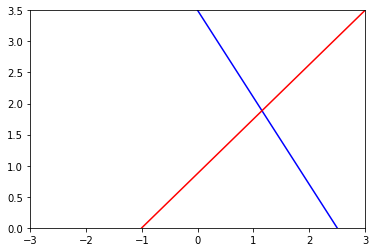

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

xlim(-3, 3)
ylim(0, 3.5)
plt.plot([0,2.5],[3.5,0],'blue',[-1,3],[0,3.5],'red')

可以用矩陣表示成：$\begin{bmatrix}
3 & 2 \\
-1 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
7\\
1
\end{bmatrix}$
<br>
設$\begin{bmatrix}3 & 2 \\-1 & 1\end{bmatrix}$為矩陣$A$，將等式兩邊左乘一個$A$的逆，就可以得到：<br>
$\begin{aligned}
A^{-1}A
\begin{bmatrix}
x \\ y
\end{bmatrix}
&= 
A^{-1}
\begin{bmatrix}
7\\
1
\end{bmatrix}\\\
&=
\frac{1}{|A|}\begin{bmatrix}1 & -2 \\ 1 & 3\end{bmatrix}
\begin{bmatrix}
7\\
1
\end{bmatrix}\\\
&=
\frac{1}{5}\begin{bmatrix}1 & -2 \\ 1 & 3\end{bmatrix}
\begin{bmatrix}
7\\
1
\end{bmatrix}\\\
&=
\frac{1}{5}\begin{bmatrix}5 \\ 10\end{bmatrix}
\end{aligned}$<br>
因此，$\begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix}1 \\ 2\end{bmatrix}$

雖然這個方法在二元一次方程這看起來還沒有初中學的校園法解得快，但使用矩陣的好處在於對於更高維的數據，比如成白上千的未知數，這個解法依然有效。<br>
在`python`中，我們可以使用`numpy`的線性代數算法庫`linalg`提供的`solve`方法來求解方程組。例：

In [12]:
a = np.matrix('3 2; -1 1')
b = np.matrix('7; 1')
print(np.linalg.solve(a, b))

[[ 1.]
 [ 2.]]


### 求向量組合
假設有向量$\vec { a }  =  \begin{bmatrix} 3 \\ -1 \end{bmatrix}$，$\vec { b }  =  \begin{bmatrix} 2 \\ 1 \end{bmatrix}$，求兩者如何組成新向量$\vec { c }  =  \begin{bmatrix} 7 \\ 1 \end{bmatrix}$？

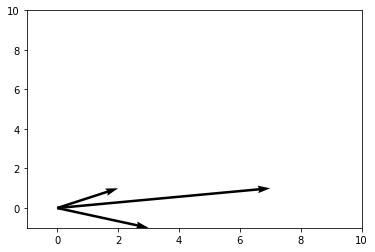

In [13]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 3, -1], [0, 0, 2, 1], [0, 0, 7, 1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

如果用$x$和$y$分別表示兩個向量的背書，這個問題就可以用矩陣表示成：$\begin{bmatrix}3 \\-1 \end{bmatrix}x + \begin{bmatrix}2 \\1\end{bmatrix}y=\begin{bmatrix}7\\1\end{bmatrix}$<br>
這樣就把這個問題轉換成和上一個問題同構了，使用同樣的方法可以得出：$\begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix}1 \\ 2\end{bmatrix}$


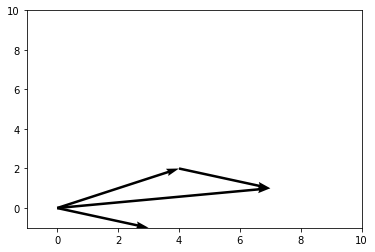

In [14]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 3, -1], [0, 0, 4, 2], [0, 0, 7, 1],[4,2,3,-1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

## Chapter Two  Determinant

### 什麼是行列式

**行列式**（Dterminant），在顯示代數中，行列式是一個值，一個數值可以告訴我們一個矩陣是否是奇異的。對於每一個$n\times n$的矩陣$A$，據對應一個標量$det(A)$，它的值將告訴我們矩陣是否為非奇異的。
<br>
1. $2\times 2$ 矩陣的行列式值
<br>
$det(\   
\left[\begin{array}{cc}   
    a & b\\   
    c & d\\      
\end{array}\right]   
\  ) = ad - bc$<br>
我們也可以用`sympy`進行核對：

In [15]:
from sympy import *
   
a,b,c,d = symbols("a,b,c,d")
M1=Matrix([[a, b], [c, d]])
print(M1.det())# print the determinant of matrix M1

a*d - b*c


### 行列式的幾何意義：二維和三維歐式空間中的例子

行列式的一個自然的怨氣就是$n$維平行體的體積。行列式的定義和$n$維平行體的體積有著本質上的關聯。<br>
在二維空間中，行列式如上面例子所示；比如說：$det(A,B) =\   
\left|\begin{array}{cc}   
    2 & 3\\   
    1 & 4\\      
\end{array}\right|   
\ = 2\bullet 4 - 3\bullet 1 = 5$，我們經過計算可以知道，當係數是實數的時候，行列式表示的就是向量$\vec A$和$\vec B$ 形成的平行四邊形的**有向面積**

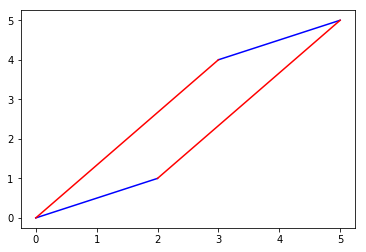

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

plt.plot([0,2],[0,1],'blue',[3,5],[4,5],'blue',[0,3],[0,4],'red',[2,5],[1,5],'red')

In [17]:
import numpy as np
   
a = np.matrix([[2,1],[3,4]])
print(np.linalg.det(a))# print the determinant of matrix M1

5.0


我們通過計算，可以得到這個矩陣的行列式等於$5$，可以看出，上圖由紅線和藍線形成的是一個平行四邊形，我們可以通過計算得出，它的面積等於$5$<br>
*這裡只是簡單介紹二維行列式，具體請查閱課本**

那如果是三位空間呢？在三維的有向空間中，三個三維向量的行列式是$\left|\begin{array}{ccc}   
    x & x' & x''\\   
    y & y' & z''\\
    z & z' & z''
\end{array}\right|  
\ = xy'z'' + x'y''z + x''yz' - xy''z' - xyz'' - x''y'z $
<br>
比如說，三個向量$(2,1,5),(6,0,8)$ 和 $(3,2,4)$ 的行列式為：
$\left|\begin{array}{ccc}   
    2 & 6 & 3\\   
    1 & 0 & 2\\
    5 & 8 & 4
\end{array}\right| = 28
$

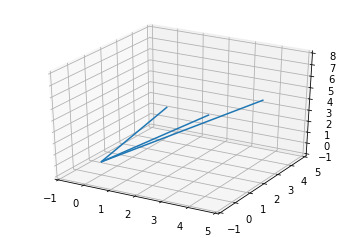

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p0 = [2, 1,5]
p1 = [6,0,8]
p2 = [3,2,4]

origin = [0,0,0]
X, Y, Z = zip([0,0,0],origin,origin) 
U, V, W = zip(p0,p1,p2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.001)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
ax.set_zlim([-1, 8])

plt.show()

類比一下二維向量的行列式，我們可以猜測一下三維向量組的行列式的幾何意義，就是這三個向量行程的平行六面體的**有向體積**<br>；我們可以用`python`來算它的行列式：

In [95]:
a = np.matrix([[2,1,5],[6,0,8],[3,2,4]])
print(np.linalg.det(a))

28.0


***特別的，如果向量組中，所有向量共線或者共面（線性相關），面積或體積為零**，什麼是線性相關，我們會在後面解釋*

## Chapter Three Vector

### What is Vector

在初中（或高中）物理，我們就已經接觸過向量了，那向量到底是什麼？它是指一個同事具有大小和方向，且滿足平行四邊形法則的集合對象。一般地，同時滿足具有大小和方向兩個性質的集合對象就可以稱作為向量（物理中的電流：有方向，有大小，但是它不是向量，這是特殊情況，我們在線性代數中不討論）。與向量相對的叫做**標量**（scalar），一般標量和向量最大的區別就是是否有向。<br>
在$R^n$空間中定義$\vec V$，可以用一個包含$n$個實數的有序集來表示：$\vec V = \begin{bmatrix} v_1 \\ v_2 \\ \dots \\ v_n\end{bmatrix}$，這個有序集中的每一個元素被稱為向量的分量（在某一維度的量）。例如，一個在$R^2$空間的向量$\begin{bmatrix} 2 \\ 1 \end{bmatrix}$,我們也可以用$(2,1)$或$<2,1>$來表示：

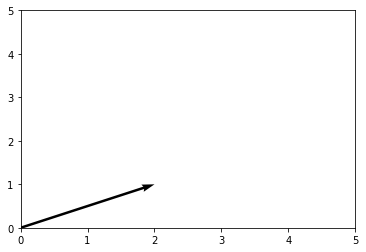

In [100]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 2, 1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
plt.draw()
plt.show()

向量的長度被定義為$\parallel v \parallel = \sqrt{v_1^2 + v_2^2 +\dots + v_n^2}$；當然的，當$\parallel v \parallel = 1$，我們稱這個向量是**單位向量**

### 基本運算

#### 加法

向量$a$和向量$b$的加法定義為：$\mathbf{a} + \mathbf{b} = \begin{bmatrix} a_1 + b_2 \\ a_2 + b_2 \\ \dots \\a_n + b_n \end{bmatrix}$<br>
下面通過畫圖來示意向量$\mathbf{a} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$與$\mathbf{b} = \begin{bmatrix}3 \\ 1\end{bmatrix}$相加，等於$\begin{bmatrix} 2 \\ 3 \end{bmatrix}$

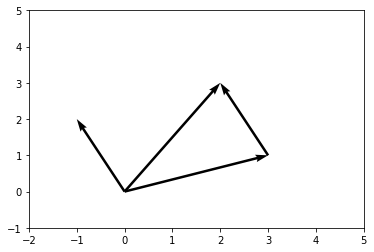

In [111]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, -1, 2], [0, 0, 3, 1], [0, 0, 2, 3],[3,1,-1,2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-2, 5])
ax.set_ylim([-1, 5])
plt.draw()
plt.show()

可以看出，向量的加法是遵從平行四邊形法則的，在`python`中，我們可以直接用`numpy`的`ndarray`來表示向量：

In [112]:
import numpy as np
a = np.array([-1,2])
b = np.array([3,1])
print(a+b)

[2 3]


#### 減法

了解了加法了，減法就相當於加了一個反方向的向量，$\mathbf{a} - \mathbf{b} = \begin{bmatrix} a_1 - b_1 \\ a_2 - b_2 \\ \ldots \\ a_n - b_n \end{bmatrix}$，下面通過畫圖來示意向量$\mathbf{a} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$與$\mathbf{b} = \begin{bmatrix}3 \\ 1\end{bmatrix}$相減，等於$\begin{bmatrix} -4 \\ 1 \end{bmatrix}$

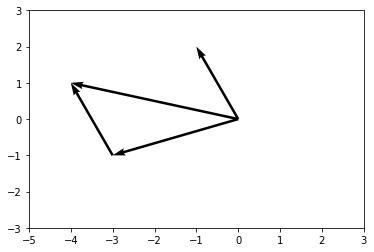

In [123]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, -1, 2], [0, 0, -3, -1], [0, 0, -4, 1],[-3,-1,-1,2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-5, 3])
ax.set_ylim([-3, 3])
plt.draw()
plt.show()

In [124]:
import numpy as np
a = np.array([-1, 2])
b = np.array([3, 1])
print(a - b)


[-4  1]


#### 乘法

##### 標量乘以向量

標量$c$乘以向量$\mathbf{a}$定義為：$c \cdot \mathbf{a} = \begin{bmatrix} c \cdot a_1 \\ c \cdot a_2 \\ \ldots \\ c \cdot a_n \end{bmatrix} = \begin{bmatrix} a_1 \cdot c \\ a_2 \cdot c \\ \ldots \\ a_n \cdot c \end{bmatrix}$<br>
用圖來示意$\mathbf{a} \begin{bmatrix} -1 \\2 \end{bmatrix}$乘以一個標量$3$得到$\begin{bmatrix}-3 \\ 6 \end{bmatrix}$

In [125]:
import numpy as np
a = np.array([-1,2])
print(3 * a)

[-3  6]


##### 向量點積

定義如下：$\vec{\mathbf{a}}\cdot \vec{\mathbf{b}} = \begin{bmatrix} a_1 \\ a_2 \\ \ldots \\ a_n\end{bmatrix} \cdot \begin{bmatrix} b_1 \\ b_2 \\ \ldots \\ b_n \end{bmatrix} = a_{1}b_{1} + a_{2}b_{2} + \ldots + a_{n}b_{n}$ 可以看出，向量點積得到的是一個標量；<br>
例如: $\begin{bmatrix} 3 \\ 5 \\ 2 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix} = 3 \cdot 1 + 5 \cdot 4 + 2 \cdot 7 = 37$

In [129]:
import numpy as np

vec_1 = np.array([3,5,2])
vec_2 = np.array([1,4,7])
print(np.dot(vec_1, vec_2))# dot product of vectors
print(vec_1 * vec_2) # cross multipication of vectors

37
[ 3 20 14]


可以看出，第一個答案是點乘出來的結果，在`python-numpy`中，我們用`np.dot(vector, vector)`來計算兩個或多個向量的點積。而`(vector * vector)`則是計算向量的叉乘結果，下面來介紹一下叉乘（向量積）：<br>
它是向量和向量的乘積，不過結果是一個向量，它的集合意義是所得的向量和被乘向量所在的平面垂直，方向由右手定則規定，大小是兩個被乘向量張成的平行四邊形的面積。所以，向量積不滿足交換律。